In [1]:
import numpy as np
import xarray as xr
import os
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('./grl.mplstyle')

# from windwave.defs import Case, Interface2D
# from windwave.prepare import read_p, read_fields

%load_ext autoreload
%autoreload 3
    
from windwave.fio import read_fields_2D

In [2]:
PATH = '/scratch/jw8736/ctr/outputs/'

### NWP

In [36]:
file = PATH + 'NWP_ZPG_CU2/span_aver.nc'
ds1 = xr.open_dataset(file).sel(t=slice(45,57.1))
file = PATH + 'NWP_ZPG_CU4/span_aver.nc'
ds2 = xr.open_dataset(file).sel(t=slice(45,57.1))
file = PATH + 'NWP_ZPG_CU8/span_aver.nc'
ds3 = xr.open_dataset(file).sel(t=slice(45,57.1))
                     
CUs = [2,4,8]
dss = [ds1,ds2,ds3]
start_time = 45 
for ds in dss:
    ds['y'] = ds['y'] - 1
    ds['t'] = ds['t'] - start_time

/state/partition1/job-50740327/ipykernel_2935093/3335573649.py:20: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


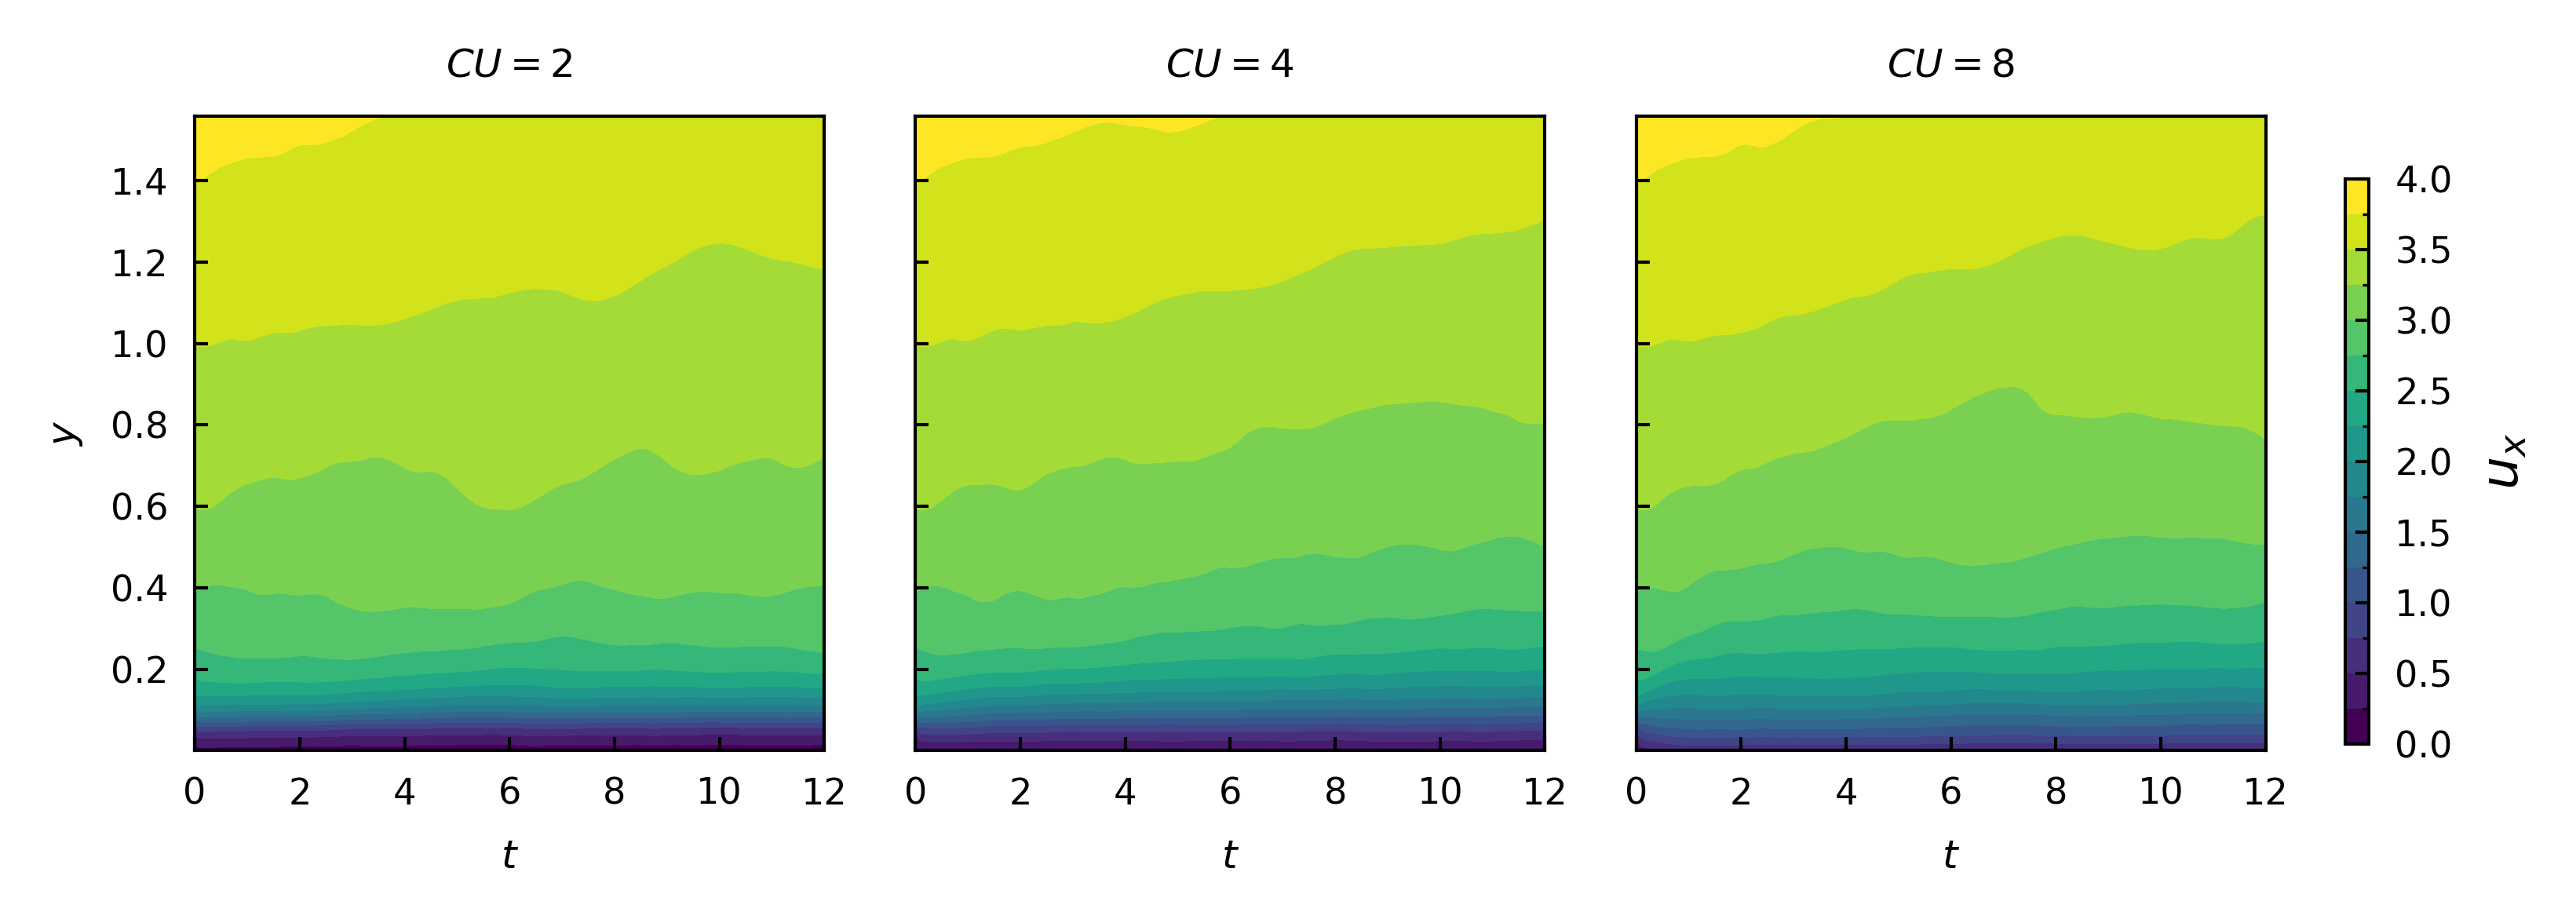

In [23]:
####### First way of creating panels of CU ##########
fig, axes = plt.subplots(1, 3, sharey=True, figsize=[5,2])

for i, ds in enumerate(dss):
    a = ds.where((ds.y>0) & (ds.y<2*np.pi/4), drop=True).ux.mean(dim='x').plot.contourf(x='t', \
    vmin=0, vmax=4, levels=17, ax=axes[i], add_colorbar=False)
    axes[i].set_title('$CU = %g$' %CUs[i], fontsize=6)
    axes[i].set_ylabel('')
    axes[i].set_xlabel('$t$', fontsize=6)
    axes[i].set_xticks([0,2,4,6,8,10,12])

cbar_ax = fig.add_axes([1, 0.2, 0.01, 0.6])  # Adjust as needed
cbar = plt.colorbar(a, cax=cbar_ax)
cbar.set_label(r'$u_x$')

axes[0].set_ylabel('$y$', fontsize=6)
axes[0].set_yticks([0,1,2])

plt.tight_layout()

/state/partition1/job-50740327/ipykernel_2935093/739091643.py:17: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


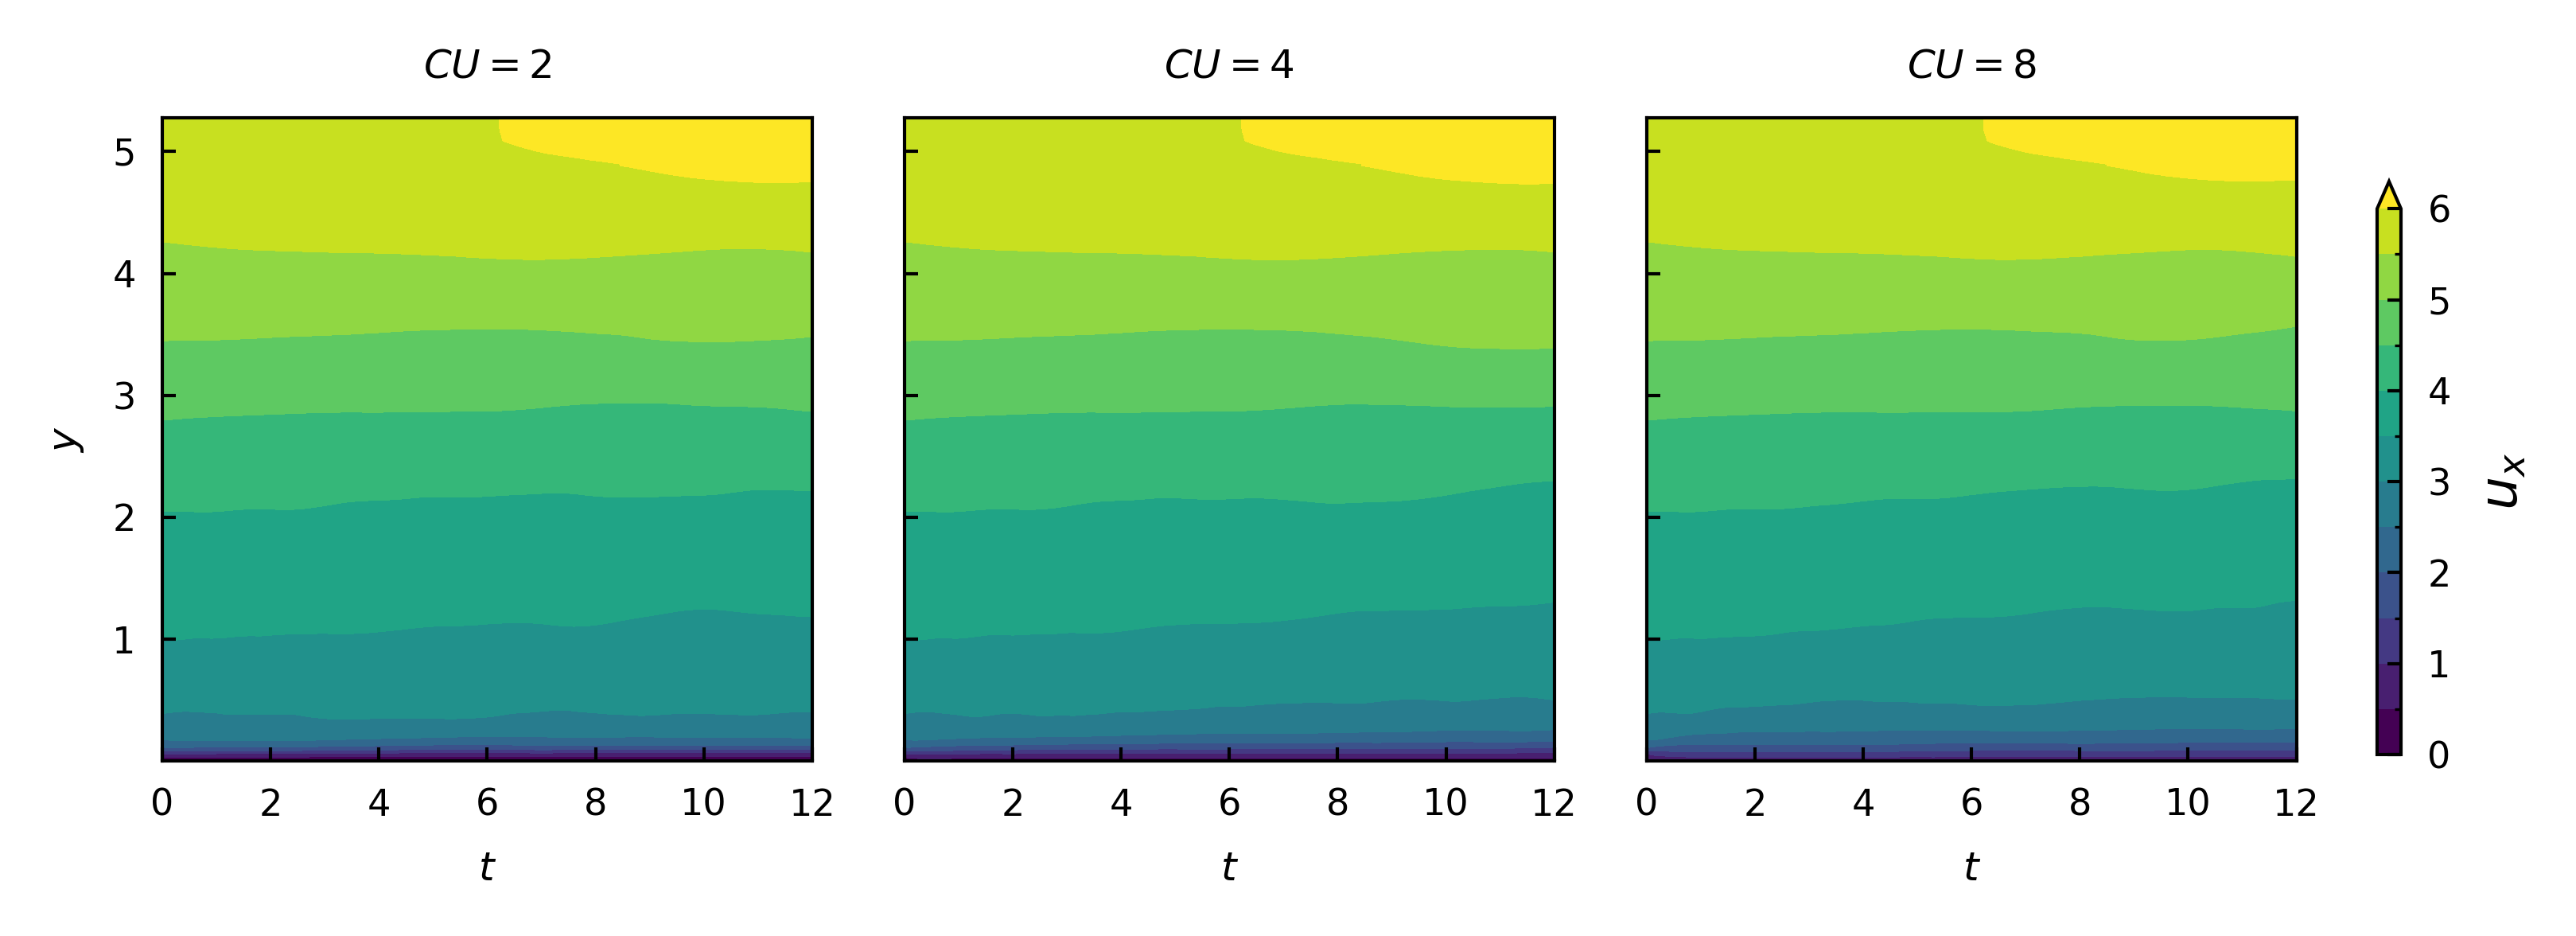

In [37]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=[5,2])

for i, ds in enumerate(dss):
    a = ds.where((ds.y>0), drop=True).ux.mean(dim='x').plot.contourf(x='t', \
    vmin=0, vmax=6, levels=13, ax=axes[i], add_colorbar=False)
    axes[i].set_title('$CU = %g$' %CUs[i], fontsize=6)
    axes[i].set_ylabel('')
    axes[i].set_xlabel('$t$', fontsize=6)
    axes[i].set_xticks([0,2,4,6,8,10,12])

cbar_ax = fig.add_axes([1, 0.2, 0.01, 0.6])  # Adjust as needed
cbar = plt.colorbar(a, cax=cbar_ax)
cbar.set_label(r'$u_x$')

axes[0].set_ylabel('$y$', fontsize=6)

plt.tight_layout()

### Old setup

In [38]:
file = PATH + 'CU2/span_aver.nc'
ds1 = xr.open_dataset(file)
file = PATH + 'CU4/span_aver.nc'
ds2 = xr.open_dataset(file)
file = PATH + 'CU8/span_aver_patched.nc'
ds3 = xr.open_dataset(file)

CUs = [2,4,8]
dss = [ds1,ds2,ds3]
start_time = 40 
for ds in dss:
    ds['y'] = ds['y'] - 1
    ds['t'] = ds['t'] - start_time

/state/partition1/job-50740327/ipykernel_2935093/1888638301.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


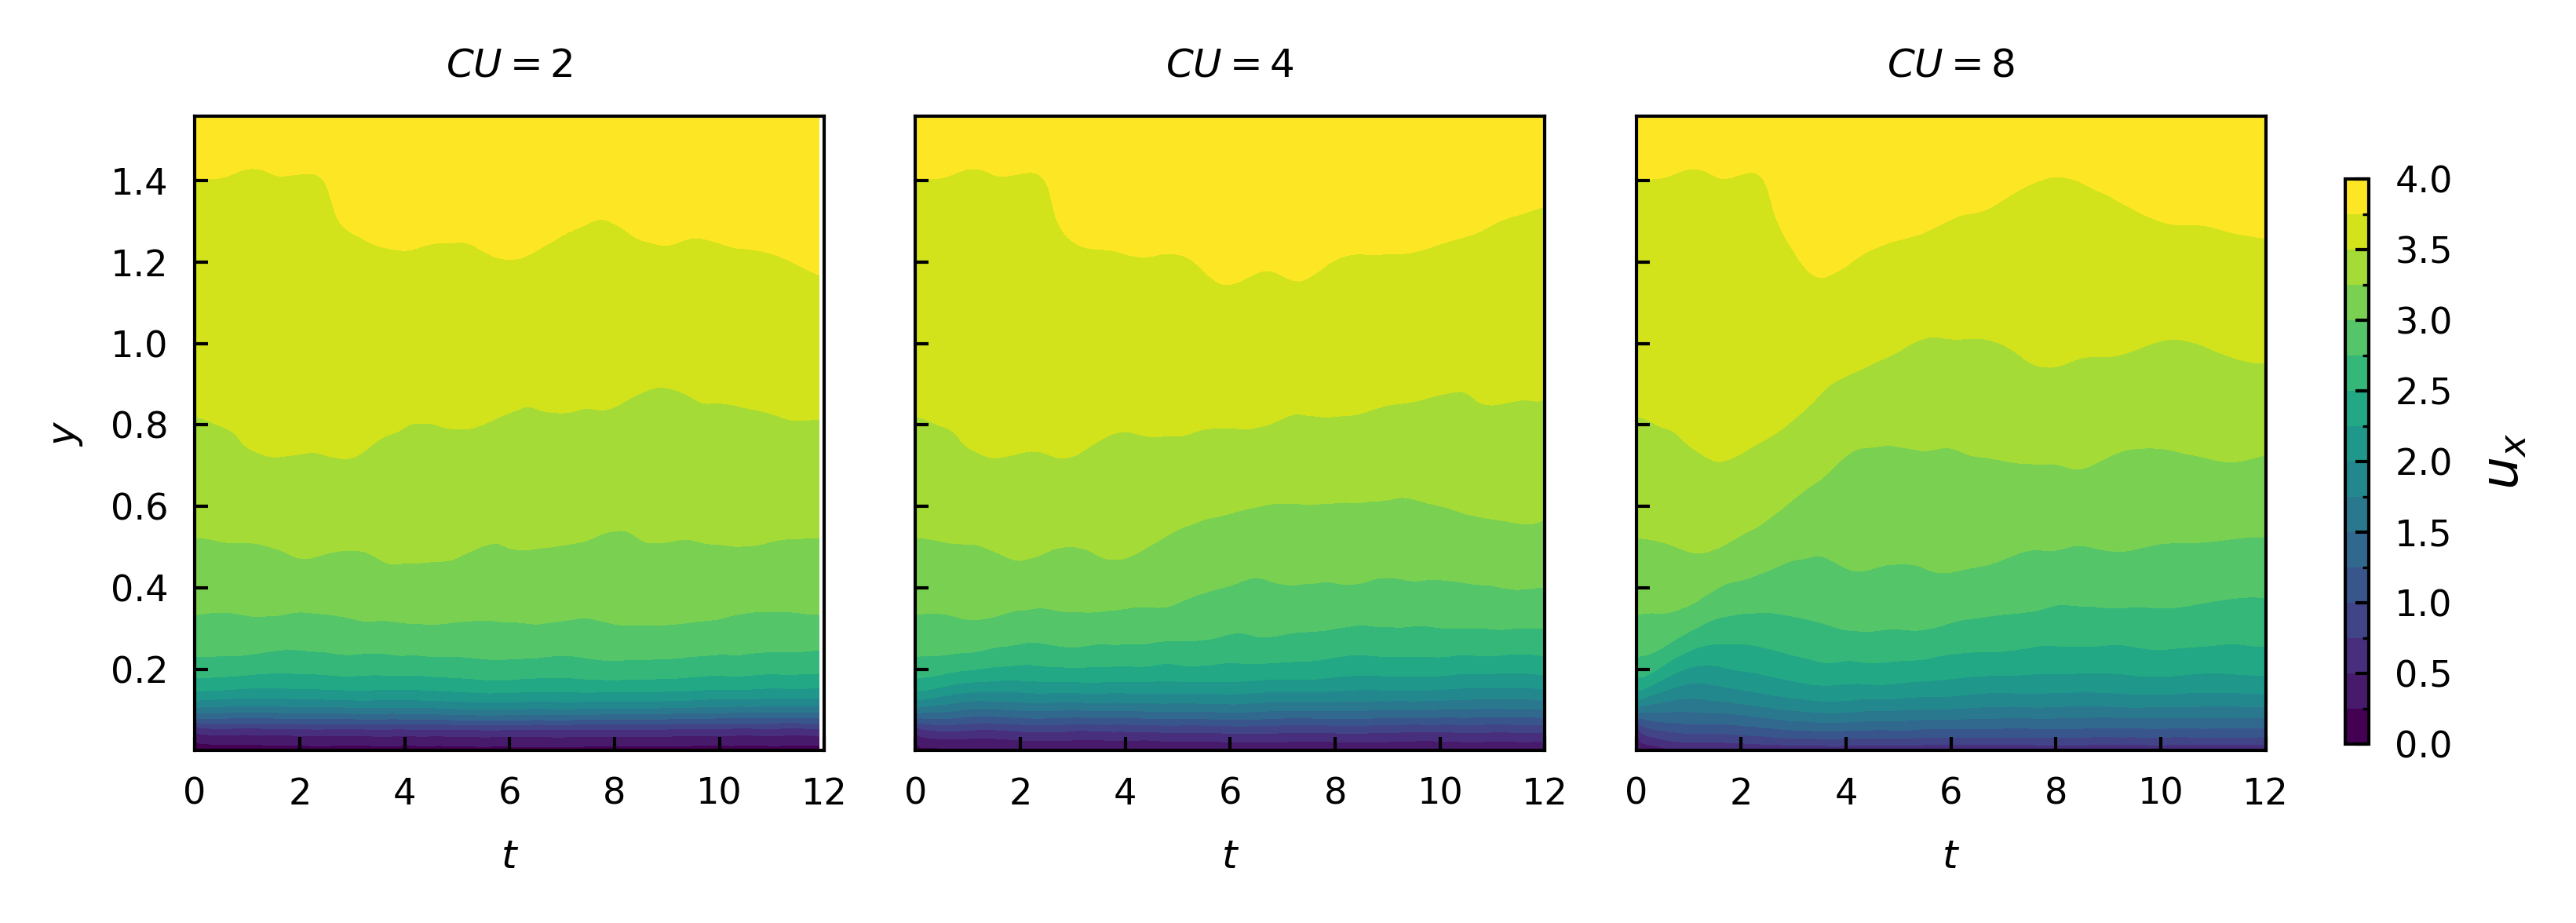

In [39]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=[5,2])

for i, ds in enumerate(dss):
    ds = ds.sel(t=slice(0,12.1))
    a = ds.where((ds.y>0) & (ds.y<2*np.pi/4), drop=True).ux.mean(dim='x').plot.contourf(x='t', \
    vmin=0, vmax=4, levels=17, ax=axes[i], add_colorbar=False)
    axes[i].set_title('$CU = %g$' %CUs[i], fontsize=6)
    axes[i].set_ylabel('')
    axes[i].set_xlabel('$t$', fontsize=6)
    axes[i].set_xticks([0,2,4,6,8,10,12])

cbar_ax = fig.add_axes([1, 0.2, 0.01, 0.6])  # Adjust as needed
cbar = plt.colorbar(a, cax=cbar_ax)
cbar.set_label(r'$u_x$')

axes[0].set_ylabel('$y$', fontsize=6)
# axes[0].set_yticks([0,1])

plt.tight_layout()

/state/partition1/job-50740327/ipykernel_2935093/4160030714.py:19: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


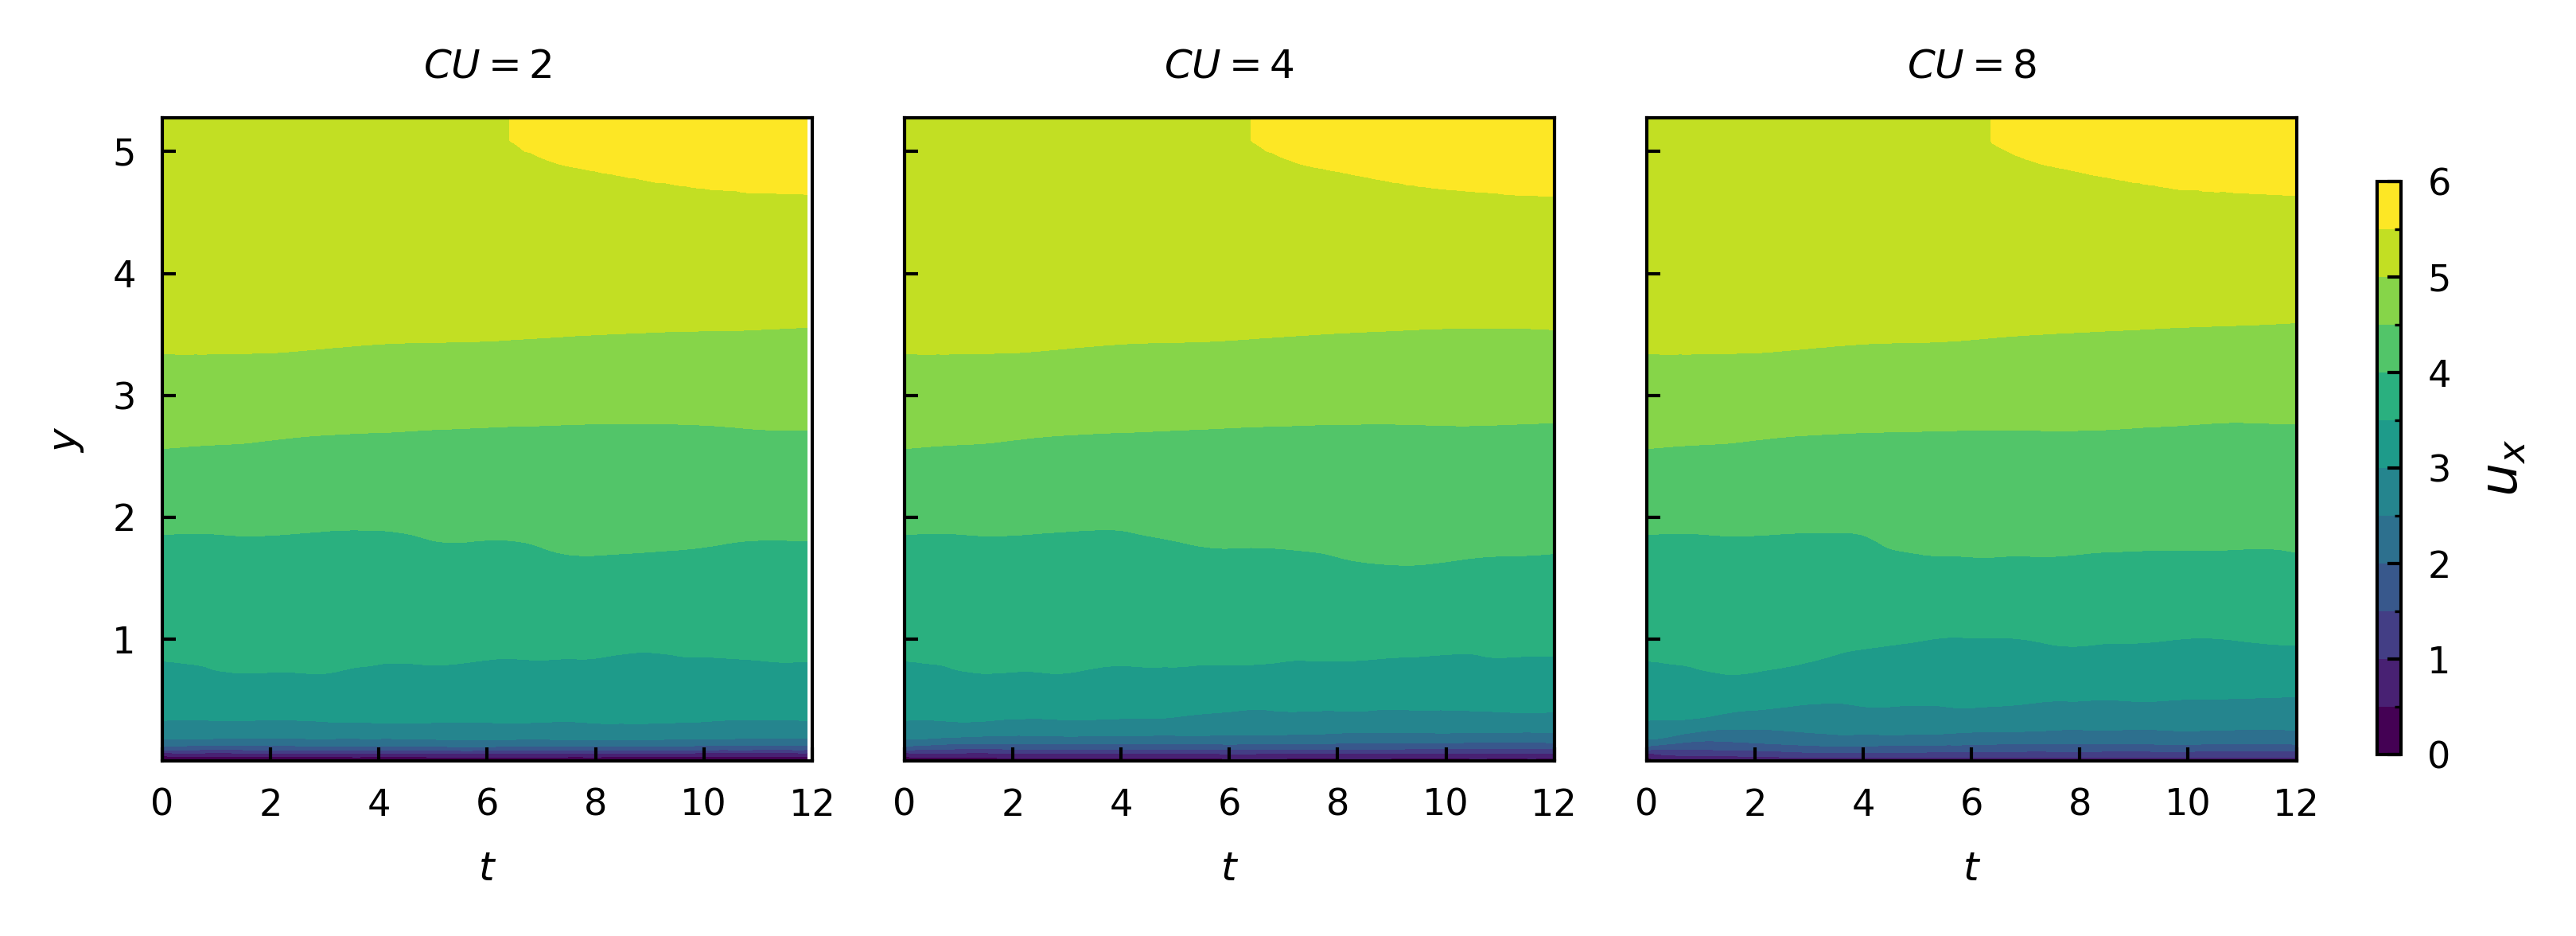

In [40]:
fig, axes = plt.subplots(1, 3, sharey=True, figsize=[5,2])

for i, ds in enumerate(dss):
    ds = ds.sel(t=slice(0,12.1))
    a = ds.where((ds.y>0), drop=True).ux.mean(dim='x').plot.contourf(x='t', \
    vmin=0, vmax=6, levels=13, ax=axes[i], add_colorbar=False)
    axes[i].set_title('$CU = %g$' %CUs[i], fontsize=6)
    axes[i].set_ylabel('')
    axes[i].set_xlabel('$t$', fontsize=6)
    axes[i].set_xticks([0,2,4,6,8,10,12])

cbar_ax = fig.add_axes([1, 0.2, 0.01, 0.6])  # Adjust as needed
cbar = plt.colorbar(a, cax=cbar_ax)
cbar.set_label(r'$u_x$')

axes[0].set_ylabel('$y$', fontsize=6)

plt.tight_layout()

In [35]:
path = '/home/ctrsp-2024/jiarongw/outputs/CU8/'
# times = np.arange(40,52,0.1)
times = np.arange(40,46.3,0.1)
ds1 = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f'])

path = '/home/ctrsp-2024/jiarongw/outputs/CU8_ensem2/'
times = np.arange(40,46.3,0.1)
ds2 = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f'])

# path = '/home/ctrsp-2024/jiarongw/outputs/CU8_ensem3/'
# times = np.arange(45,53,0.1)
# ds3 = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f'])

ds = xr.concat([ds1, ds2], dim='ensem')
start_time = 40
ds['y'] = ds['y'] - 1
ds['t'] = ds['t'] - start_time

### Old way to plot

In [77]:
path1 = '/home/ctrsp-2024/jiarongw/outputs/NWP_ZPG_CU2/'
path2 = '/home/ctrsp-2024/jiarongw/outputs/NWP_ZPG_CU4/'
path3 = '/home/ctrsp-2024/jiarongw/outputs/NWP_ZPG_CU8/'

paths = [path1, path2, path3]
CUs = [2,4,8]
times = np.arange(45,58,0.1)
start_time = 45

dss = []
for i, path in enumerate(paths):
    ds = read_fields_2D(path, times, NSLICE=512, NGRID=512, varlist=['ux','uy','uz','f'])
    ds['y'] = ds['y'] - 1
    ds['t'] = ds['t'] - start_time
    dss.append(ds)

ds = xr.concat(dss, dim='CU')
ds['CU'] = np.array(CUs)

/tmp/ipykernel_154120/3928034758.py:4: DeprecationWarning: self.axes is deprecated since 2022.11 in order to align with matplotlibs plt.subplots, use self.axs instead.
  for i, ax in enumerate(g.axes.flat):


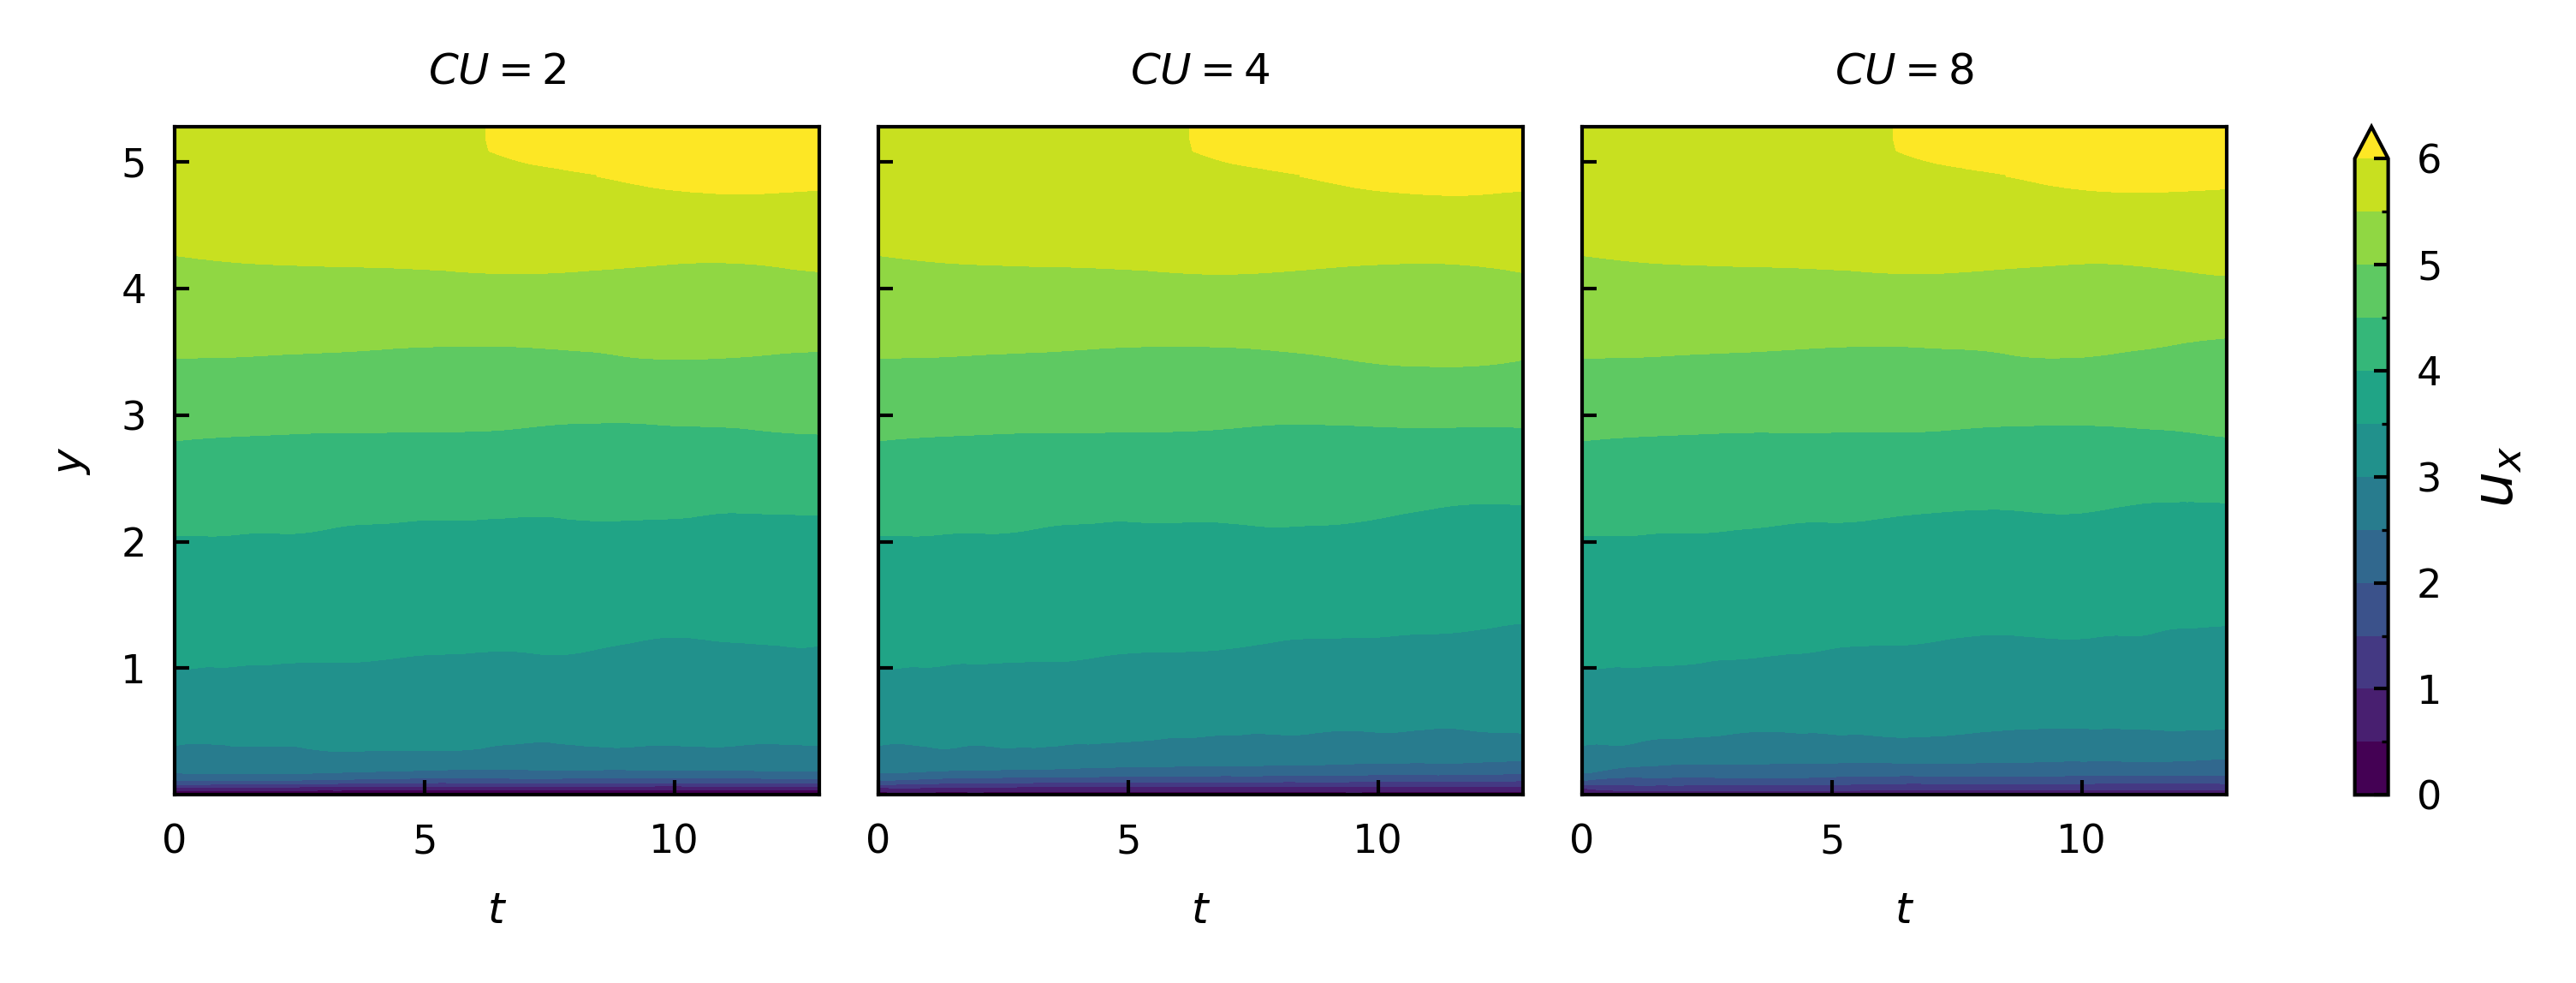

In [91]:
g = ds.ux.where(ds.y>0, drop=True).mean(dim='x').plot.contourf(col='CU', \
        x='t', col_wrap=3, vmin=0, vmax=6, levels=13, cbar_kwargs={'label':r'$u_x$'}, figsize=[5.5,2])
g.set_titles(template="$CU = {value}$", fontsize=6)
for i, ax in enumerate(g.axes.flat):
    ax.set_xlabel('$t$', fontsize=6)
    if i == 0:
        ax.set_ylabel('$y$', fontsize=6)